# Creating test data set

In [1]:
from planet4 import p4io
dbname = p4io.get_current_database_fname()
dbname

'/Users/klay6683/data/planet4/2015-06-07_planet_four_classifications_queryable_cleaned.h5'

In [2]:
db = p4io.DBManager(dbname)
p4ids = db.image_ids
p4ids[0]

'APF00002q1'

In [3]:
data = db.get_image_id_markings(p4ids[6])

In [4]:
%matplotlib notebook

In [5]:
from planet4 import markings
p4id_data = markings.ImageID(p4ids[6])

<IPython.core.display.Javascript object>


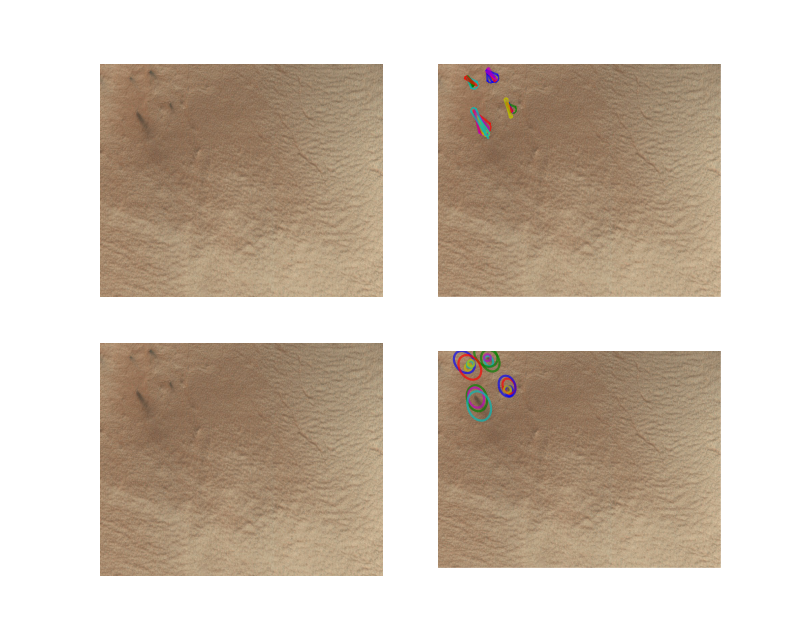

In [6]:
p4id_data.plot_all()

In [7]:
from planet4.clustering import DBScanner

<IPython.core.display.Javascript object>


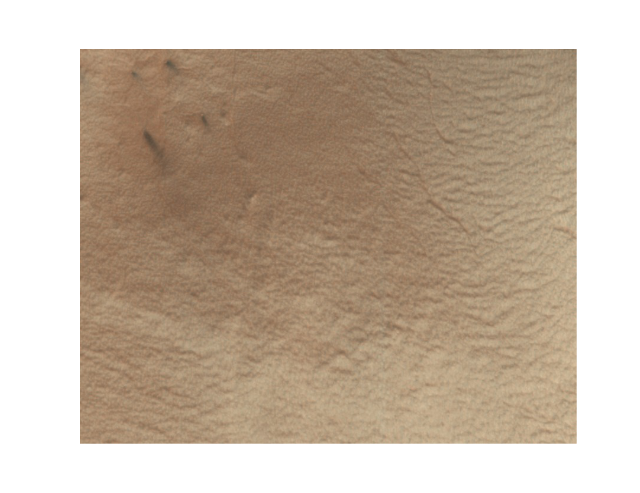

In [8]:
reduced_fans = DBScanner(p4id_data.get_fans(), kind='fan',
                         scope='hirise').reduced_data
fans_data = [cluster.data for cluster in reduced_fans]
p4id_data.plot_fans(fans=pd.DataFrame(fans_data))
for fan in reduced_fans:
    fan.add_midpoint_pointer(plt.gca())

<IPython.core.display.Javascript object>


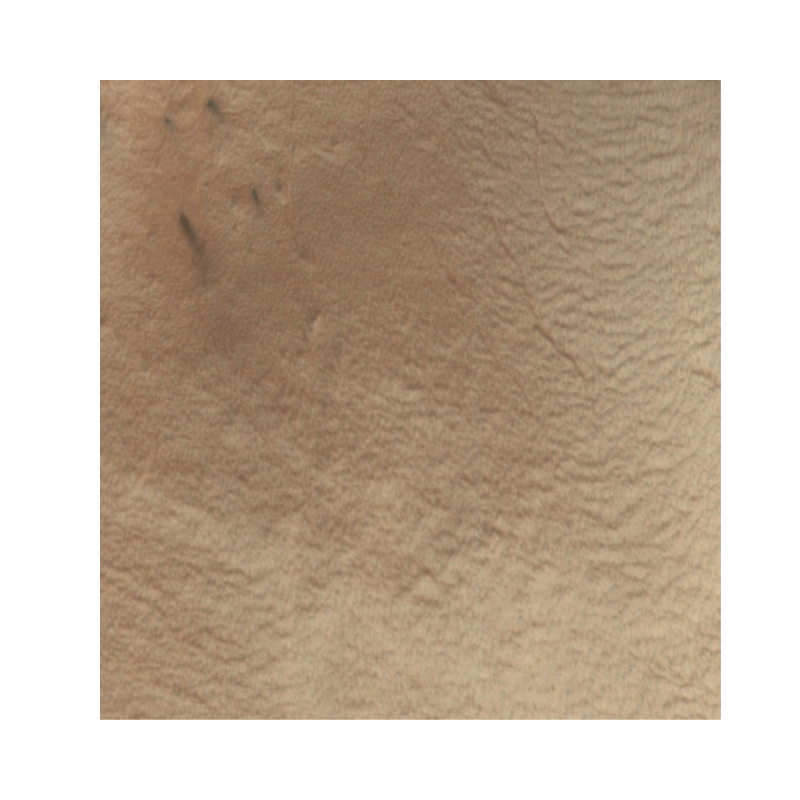

In [18]:
reduced_blotches = DBScanner(p4id_data.get_blotches(), kind='blotch',
                             scope='hirise').reduced_data
blotches_data = [cluster.data for cluster in reduced_blotches]
fig, ax = plt.subplots()
p4id_data.plot_blotches(blotches=pd.DataFrame(blotches_data), ax=ax)
p4id_data.plot_fans(fans=pd.DataFrame(fans_data), ax=ax)
for fan in reduced_fans:
    fan.add_midpoint_pointer(plt.gca())

In [19]:
from numpy.linalg import norm
for blotch in reduced_blotches:
    print(blotch.center)
    for fan in reduced_fans:
        fancoord = fan.base + fan.midpoint
        delta = blotch.center - (fan.base+fan.midpoint)
        print(norm(delta))

(94.5, 32923.75)
125.829517869
143.791301634
64.6846709937
6.61629078024
64.5331306339


In [15]:
reduced_blotches[0].data

x           94.374992
y           43.750000
angle       42.301364
radius_1    17.500000
radius_2    15.000000
dtype: float64

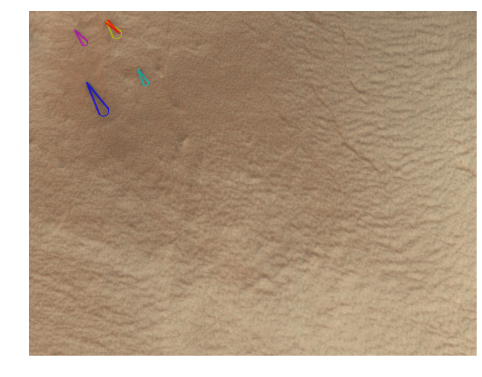

In [19]:
p4id_data.plot_fans(fans=pd.DataFrame(fans_data))